In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

home_path = 'C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\electricity_prices'
os.chdir(home_path)
dynamic_filepaths = [i.path for i in os.scandir(home_path + '/output') if not i.is_dir() if '.xlsx' in i.name if 'dynamic' in i.name]

#### read in dynamic price time series for 2019 and 2022

In [12]:
d_19, d_22 = pd.read_excel(dynamic_filepaths[0], index_col=0), pd.read_excel(dynamic_filepaths[-1], index_col=0)

In [14]:
d_19.loc[(d_19.index >= '2019-01-15') & (d_19.index < '2019-01-22')]

,price_ct_kWh
time,
2019-01-15 00:00:00,22.57200
2019-01-15 00:15:00,22.55125
2019-01-15 00:30:00,22.53050
2019-01-15 00:45:00,22.50975
2019-01-15 01:00:00,22.48900
...,...
2019-01-21 22:45:00,24.42750
2019-01-21 23:00:00,24.40900
2019-01-21 23:15:00,24.40550


In [33]:
d_19.loc[(d_19.index.day >= 15) & (d_19.index.month == 1)]

,price_ct_kWh
time,
2019-01-15 00:00:00,22.57200
2019-01-15 00:15:00,22.55125
2019-01-15 00:30:00,22.53050
2019-01-15 00:45:00,22.50975
2019-01-15 01:00:00,22.48900
...,...
2019-01-31 22:45:00,23.42425
2019-01-31 23:00:00,23.34500
2019-01-31 23:15:00,23.39300


In [4]:
def weekly_avg(df_in):
    df_out = df_in.copy()
    df_out['price_ct_kWh_v2'] = 0
    for i in range(1,53):
        df_out.loc[df_out.index.isocalendar().week == i, 'price_ct_kWh_v2'] = df_out[df_out.index.isocalendar().week == i]['price_ct_kWh'].mean(axis=0)
    df_out.drop(['price_ct_kWh'], axis=1, inplace=True)
    df_out.columns = ['price_ct_kWh']
    
    return df_out

In [58]:
# plot dynamic and newly created static price series for 2019 and 2022
df_dynamic_2019 = pd.read_excel(dynamic_filepaths[0], index_col=0)
#df_dynamic_2021 = pd.read_excel(dynamic_filepaths[1], index_col=0)
df_dynamic_2022 = pd.read_excel(dynamic_filepaths[2], index_col=0)

df_static_2019 = weekly_avg(df_dynamic_2019)
#df_static_2021 = weekly_avg(df_dynamic_2021)
df_static_2022 = weekly_avg(df_dynamic_2022)

In [59]:
# define ranges
s_start_date, s_end_date = '-06-15', '-06-22'
w_start_date, w_end_date = '-01-15', '-01-22'
years = ['2019', '2022']
# 2019: winter week
mean_w_19 = df_dynamic_2019.loc[(df_dynamic_2019.index >= '2019-01-15') & (df_dynamic_2019.index < '2019-01-22')].mean(axis=0)
df_static_2019.loc[(df_static_2019.index >= '2019-01-15') & (df_static_2019.index < '2019-01-22'), 'price_ct_kWh'] = mean_w_19
df_static_2019.loc[(df_static_2019.index >= '2019-01-15') & (df_static_2019.index < '2019-01-22'), ['price_ct_kWh']] = mean_w_19.values[0]
# 2019: summer week
mean_s_19 = df_dynamic_2019.loc[(df_dynamic_2019.index >= '2019-06-15') & (df_dynamic_2019.index < '2019-06-22')].mean(axis=0)
df_static_2019.loc[(df_static_2019.index >= '2019-06-15') & (df_static_2019.index < '2019-06-22'), 'price_ct_kWh'] = mean_s_19
df_static_2019.loc[(df_static_2019.index >= '2019-06-15') & (df_static_2019.index < '2019-06-22'), ['price_ct_kWh']] = mean_s_19.values[0]
# 2022: winter week
mean_w_22 = df_dynamic_2022.loc[(df_dynamic_2022.index >= '2022-01-15') & (df_dynamic_2022.index < '2022-01-22')].mean(axis=0)
df_static_2022.loc[(df_dynamic_2022.index >= '2022-01-15') & (df_dynamic_2022.index < '2022-01-22'), 'price_ct_kWh'] = mean_w_22
df_static_2022.loc[(df_dynamic_2022.index >= '2022-01-15') & (df_dynamic_2022.index < '2022-01-22'), ['price_ct_kWh']] = mean_w_22.values[0]
# 2019: summer week
mean_s_22 = df_dynamic_2022.loc[(df_dynamic_2022.index >= '2022-06-15') & (df_dynamic_2022.index < '2022-06-22')].mean(axis=0)
df_static_2022.loc[(df_dynamic_2022.index >= '2022-06-15') & (df_dynamic_2022.index < '2022-06-22'), 'price_ct_kWh'] = mean_s_22
df_static_2022.loc[(df_dynamic_2022.index >= '2022-06-15') & (df_dynamic_2022.index < '2022-06-22'), ['price_ct_kWh']] = mean_s_22.values[0]

#### Plot time series for 2019 and 2022 for selected time frame

In [64]:
plt.rcParams.update({'font.size': 15})

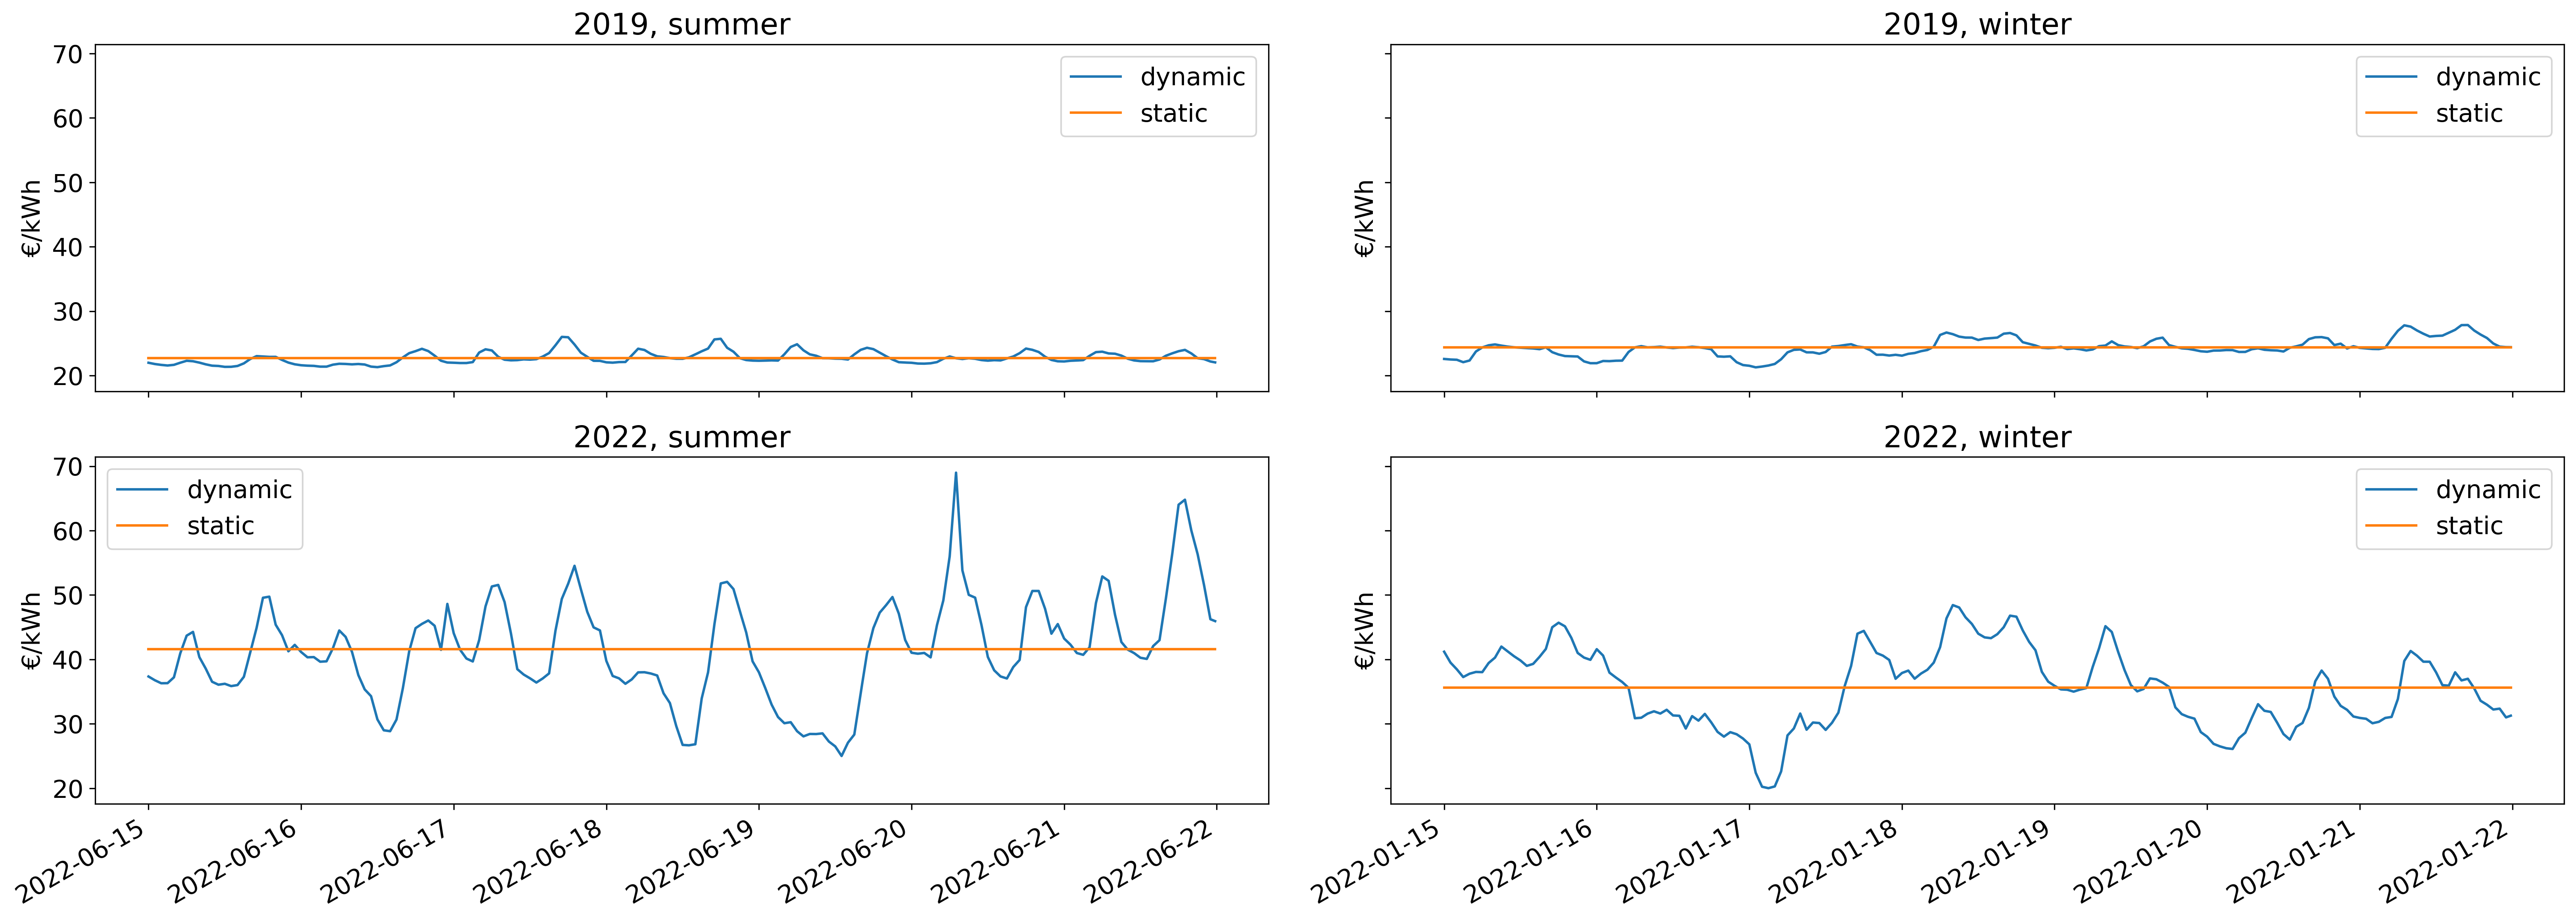

In [66]:
# define ranges
s_start_date, s_end_date = '-06-15', '-06-22'
w_start_date, w_end_date = '-01-15', '-01-22'
years = ['2019', '2022']
dfs = [[df_dynamic_2019, df_static_2019],
         [df_dynamic_2022,df_static_2022]]
months = ['06', '01']
# set up plot
fig, ax = plt.subplots(figsize = (22,8), nrows=2, ncols=2, sharey=True)
for i in range(len(years)):
    # extract dynamic and static df for given year
    y_dfs = dfs[i]
    for j in range(len(months)):
        start, end = f'{years[i]}-{months[j]}-15', f'{years[i]}-{months[j]}-22'
        # extract dynamic and static df
        df_d, df_s = y_dfs[0], y_dfs[1]
        l1 = ax[i][j].plot(df_d.loc[(df_d.index >= start) & (df_d.index < end)], label = 'dynamic')
        l2 = ax[i][j].plot(df_s.loc[(df_s.index >= start) & (df_s.index < end)], label = 'static')
        season = 'summer' if int(months[j]) == 6 else 'winter'
        ax[i][j].set_title(f'{years[i]}, {season}')
        ax[i][j].set_ylabel('€/kWh')
        ax[i][j].set_xlabel('')
        ax[i][j].legend()
plt.tight_layout()
fig.autofmt_xdate()
plt.gcf().set_dpi(300)

#### Plot yearly time series for 2019 and 2022

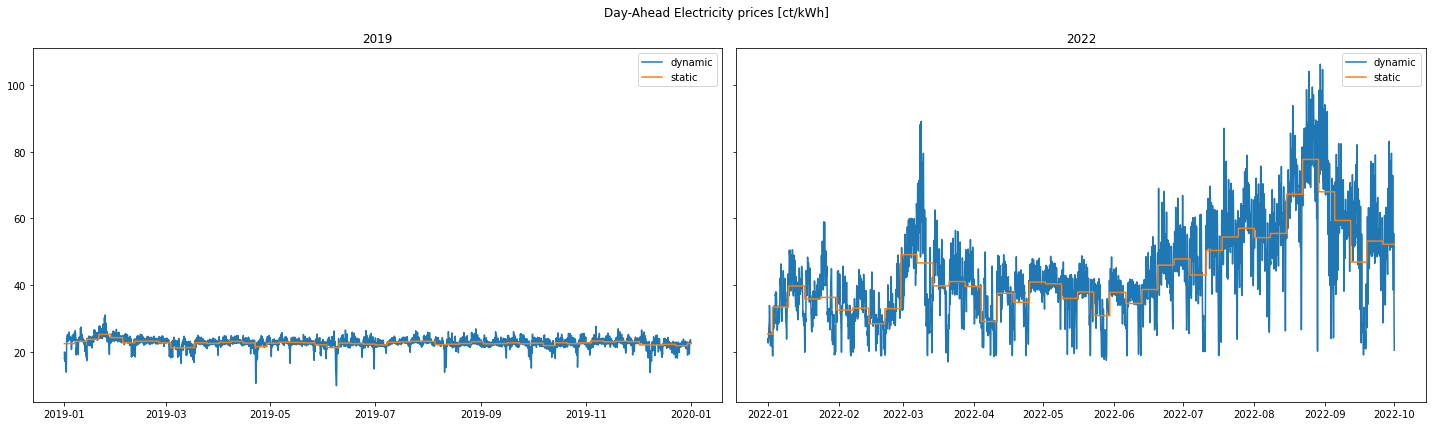

In [90]:
l = [[df_dynamic_2019, df_static_2019], [df_dynamic_2022, df_static_2022]]
titles = ['2019', '2022']
fig, ax = plt.subplots(figsize = (20,6), ncols = 2, sharey=True)
for i in range(len(ax)):
    l1 = ax[i].plot(l[i][0], label = 'dynamic')
    l2 = ax[i].plot(l[i][1], label = 'static')
    ax[i].set_title(titles[i])
    ax[i].legend()
fig.suptitle('Day-Ahead Electricity prices [ct/kWh]')
plt.tight_layout()
plt.show()

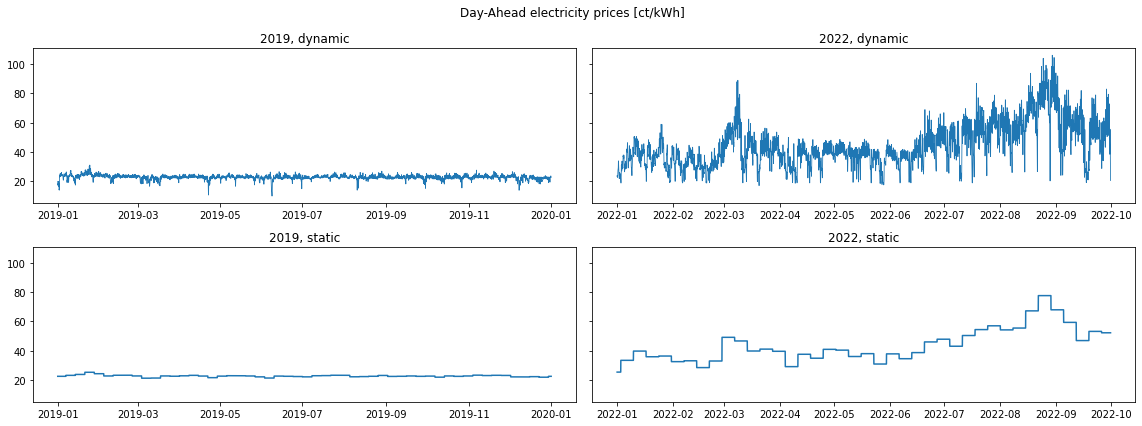

In [64]:
fig, ax = plt.subplots(figsize = (16,6), ncols=2, nrows=2, sharey=True)
dyn_2019 = ax[0][0].plot(df_dynamic_2019, linewidth = .8)
ax[0][0].set_title('2019, dynamic')
stat_2019 = ax[1][0].plot(df_static_2019)
ax[1][0].set_title('2019, static')
dyn_2022 = ax[0][1].plot(df_dynamic_2022, linewidth = .8)
ax[0][1].set_title('2022, dynamic')
stat_2022 = ax[1][1].plot(df_static_2022)
ax[1][1].set_title('2022, static')

fig.suptitle('Day-Ahead electricity prices [ct/kWh]')
plt.tight_layout()
plt.show()

In [62]:
# save as .xlsx file
output_path = 'C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\electricity_prices\output'
df_static_2019.to_excel(output_path + '2019_static_qh_price_ct_kWh.xlsx')
df_static_2022.to_excel(output_path + '2022_static_qh_price_ct_kWh.xlsx')

---

In [2]:
# read in data
df = pd.DataFrame()
for i in os.listdir():
    if 'DA_' in i:
        colname = 'price_' + i.split('.csv')[0].split('_')[-1] + '_EURMWH'
        df[colname] = pd.read_csv(i)
df.describe()

,price_2016_EURMWH,price_2017_EURMWH,price_2018_EURMWH,price_2019_EURMWH,price_2020_EURMWH,price_2021_EURMWH,price_2022_EURMWH
count,8783.000000,8759.000000,8759.000000,8759.000000,8781.000000,8759.000000,4365.000000
mean,28.982917,34.190038,44.474599,37.667668,30.474427,96.855380,186.573347
std,12.481007,17.659943,17.764268,15.518065,17.497862,73.683378,90.952361
min,-130.090000,-83.060000,-76.010000,-90.010000,-83.940000,-69.000000,-19.040000
25%,22.320000,27.785000,34.465000,31.060000,21.785000,53.015000,122.930000
50%,28.240000,33.830000,45.090000,38.060000,30.990000,75.480000,189.380000
75%,34.965000,40.570000,54.870000,46.270000,40.250000,112.035000,234.360000
max,104.960000,163.520000,128.260000,121.460000,200.040000,620.000000,700.000000


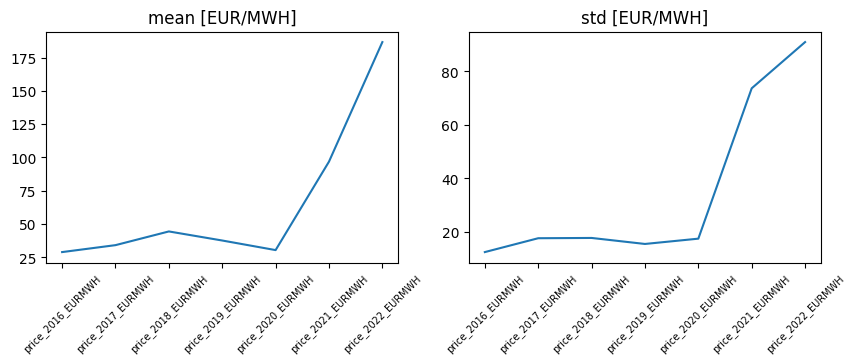

In [7]:
# plot summary statistics
fig, ax = plt.subplots(figsize=(10, 3), ncols=2)
ax[0].plot(df.describe().T['mean'])
ax[0].set_title("mean [EUR/MWH]")
ax[0].tick_params(axis='x', labelsize=7, rotation=45)
ax[1].plot(df.describe().T['std'])
ax[1].set_title("std [EUR/MWH]")
ax[1].tick_params(axis='x', labelsize=7, rotation=45)
plt.show()

In [3]:
def df_add_surcharges_taxes_fees(df, column_name):
    # 2022 surcharges based on:https://www.bdew.de/service/daten-und-grafiken/bdew-strompreisanalyse/
    surcharges = 18.99
    # ct/kWh * 10 = €/MWh
    df[column_name] = df[column_name] + surcharges * 10

    return df

In [4]:
# for each row, add n empty ones
def df_add_rows(df, n):
    empty_rows = n
    df.index = range(0, empty_rows * len(df), empty_rows)
    df_out = df.reindex(index=range(empty_rows * len(df)))
    return df_out

In [5]:
def generate_time_series(start_date_str, end_date_str, interval_min):
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d %H:%M")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d %H:%M")
    interval = timedelta(hours=interval_min / 60)
    output = []
    while start_date <= end_date:
        output.append(start_date.strftime("%Y-%m-%d %H:%M"))
        start_date += interval
    return output

In [6]:
def generate_output(start_date_str, end_date_str, df):
    qh_date_index = generate_time_series(start_date_str, end_date_str,interval_min=15)
    price_year = pd.DataFrame(qh_date_index, columns=['time'])
    price_year['price_ct_kWh'] = df_add_rows(df, 4)
    df_add_surcharges_taxes_fees(price_year, 'price_ct_kWh')
    price_year.interpolate(axis=0, inplace=True)
    price_year['price_ct_kWh'] = price_year['price_ct_kWh'] / 10

    return price_year

In [7]:
def generate_plot(df):
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(df.price_ct_kWh, linewidth=.5)
    ax.plot()
    ax.set_title('quarter hourly electricity price [ct/kWh]')

    return fig

In [89]:
price_2019 = generate_output(start_date_str='2019-01-01 00:00', end_date_str='2019-12-31 23:45', df = df[[f'price_2019_EURMWH']])
price_2021 = generate_output(start_date_str='2021-01-01 00:00', end_date_str='2021-12-31 23:45', df = df[[f'price_2021_EURMWH']])
# 2022
os.chdir('C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\electricity_prices')
df_22 = pd.read_excel('Strompreis_2022_v2.xlsx', index_col=0)
df_22.price_2022_EURMWH.fillna(0, inplace=True)
price_2022 = generate_output(start_date_str='2022-01-01 00:00', end_date_str='2022-12-31 23:45', df = df_22)
# set values to zero where timeseries ends
price_2022.price_ct_kWh.values[26208:] = 0

In [90]:
import seaborn as sns
sns.set_style('white')

C:\Users\joche\AppData\Local\Temp\ipykernel_9160\3196324931.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan'])


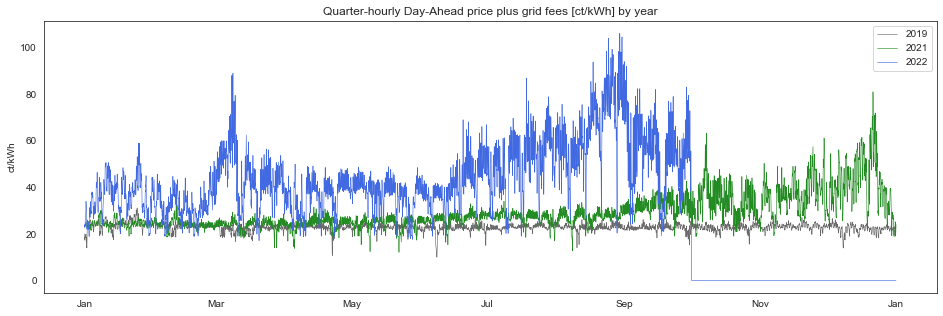

In [91]:
price_2021_v2 = price_2021.copy()
price_2022_v2 = price_2022.copy()
price_2022['time'] = pd.to_datetime(price_2022['time'], format='%Y-%m-%d %H:%M')
price_2022.index = price_2022['time']
price_2022.drop('time', axis=1, inplace=True)

price_2021['time'] = pd.to_datetime(price_2021['time'], format='%Y-%m-%d %H:%M')
price_2021.index = price_2021['time']
price_2021.drop('time', axis=1, inplace=True)

# set index to datetime for plotting
price_2019['time'] = pd.to_datetime(price_2019['time'], format='%Y-%m-%d %H:%M')
price_2021_v2['time'] = price_2019['time']
price_2022_v2['time'] = price_2019['time']
price_2019.index = price_2019.time
price_2021_v2.index = price_2021_v2.time
price_2022_v2.index = price_2022_v2.time
price_2019.drop('time', axis=1, inplace=True)
price_2021_v2.drop('time', axis=1, inplace=True)
price_2022_v2.drop('time', axis=1, inplace=True)
# crop 2022 time series to where values are zero
price_2022 = price_2022[price_2022.index < '2022-10-01 00:00']

# plot both on top of each other
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(price_2019, linewidth = 0.6, label = '2019', color='dimgrey')
ax.plot(price_2021_v2, linewidth = 0.6, label = '2021', color='forestgreen')
ax.plot(price_2022_v2, linewidth = 0.6, label = '2022', color='royalblue')
ax.set_title('Quarter-hourly Day-Ahead price plus grid fees [ct/kWh] by year')
ax.set_xticklabels(['Jan', 'Mar', 'May', 'Jul', 'Sep', 'Nov', 'Jan'])
ax.set_ylabel('ct/kWh')
ax.legend()
plt.show()

Create static price,from mean of dynamic prices

In [92]:
price_2019_mean = price_2019.price_ct_kWh.mean()
price_2021_mean = price_2021.price_ct_kWh.mean()
price_2022_mean = price_2022.price_ct_kWh.mean()

In [93]:
price_2019_static = pd.DataFrame(index = price_2019.index)
price_2019_static['price_ct_kWh'] = price_2019_mean
price_2021_static = pd.DataFrame(index = price_2021.index)
price_2021_static['price_ct_kWh'] = price_2021_mean
price_2022_static = pd.DataFrame(index = price_2022.index)
price_2022_static['price_ct_kWh'] = price_2022_mean

In [94]:
d_prices = [price_2019, price_2021, price_2022]
f_prices = [price_2019_static, price_2021_static, price_2022_static]
years = [2019, 2021, 2022]

In [103]:
pd.to_datetime('2022-10-01 00:00')

Timestamp('2022-10-01 00:00:00')

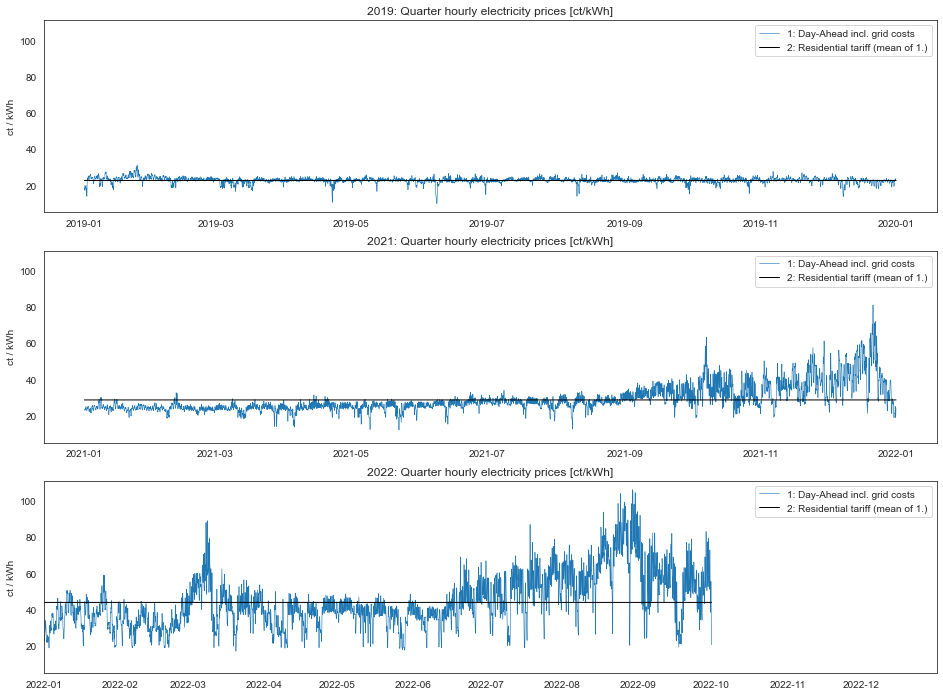

In [107]:
fig, ax = plt.subplots(nrows=3, figsize = (16,12), sharey=True)
for i in range(len(ax)):
    year = years[i]
    ax[i].plot(d_prices[i].price_ct_kWh, linewidth = 0.6, label = '1: Day-Ahead incl. grid costs')
    ax[i].plot(f_prices[i].price_ct_kWh, linewidth = 1, label = '2: Residential tariff (mean of 1.)', color = 'black')
    ax[i].set_title(f'{year}: Quarter hourly electricity prices [ct/kWh]')
    if year == 2022:
        ax[i].set_xlim(f_prices[i].index[0], pd.to_datetime('2022-12-31 23:45'))
    ax[i].set_ylabel('ct / kWh')
    ax[i].legend()
plt.show()

In [98]:
price_2019.describe()

,price_ct_kWh
count,35040.000000
mean,22.756881
std,1.538614
min,9.989000
25%,22.114000
50%,22.805125
75%,23.605000
max,31.136000


In [99]:
price_2021.describe()

,price_ct_kWh
count,35040.000000
mean,28.675027
std,7.344441
min,12.090000
25%,24.295000
50%,26.542375
75%,30.213062
max,80.990000


In [101]:
price_2022.describe()

,price_ct_kWh
count,26208.000000
mean,43.968482
std,14.546147
min,17.086000
25%,34.588687
50%,40.781250
75%,52.281625
max,106.090000


In [102]:
os.chdir('C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\electricity_prices\output')
# export dynamic qh prices [ct/kWh]
price_2019.to_excel('2019_dynamic_qh_price_ct_kWh.xlsx')
price_2021.to_excel('2021_dynamic_qh_price_ct_kWh.xlsx')
price_2022.to_excel('2022_dynamic_qh_price_ct_kWh.xlsx')

# export static qh prices [ct/kWh]
price_2019_static.to_excel('2019_static_qh_price_ct_kWh.xlsx')
price_2021_static.to_excel('2021_static_qh_price_ct_kWh.xlsx')
price_2022_static.to_excel('2022_static_qh_price_ct_kWh.xlsx')

In [219]:
# generate new series again for export
price_2019 = generate_output(start_date_str='2019-01-01 00:00', end_date_str='2019-12-31 23:45', df = df[[f'price_2019_EURMWH']])
price_2021 = generate_output(start_date_str='2021-01-01 00:00', end_date_str='2021-12-31 23:45', df = df[[f'price_2021_EURMWH']])
# 2022
os.chdir('C:\\Users\joche\FIM Kernkompetenzzentrum\Paper Agent-based Modeling - Dokumente\General\\01 Data\electricity_prices')
df_22 = pd.read_excel('Strompreis_2022_v2.xlsx', index_col=0)
df_22.price_2022_EURMWH.fillna(0, inplace=True)
price_2022 = generate_output(start_date_str='2022-01-01 00:00', end_date_str='2022-12-31 23:45', df = df_22)
# set values to zero where timeseries ends
price_2022.price_ct_kWh.values[26208:] = 0